<a href="https://colab.research.google.com/github/JMSBornot/PytorchCourseDL/blob/main/simple_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
# Create a model class that inherits nn.module
class Model(nn.Module):
  # Input layer (4 features of each flower) ->
  # Hidden Layer 1 (H1: number of neurons = n) ->
  # H2 (n) -> output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate the ancestor class
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [28]:
torch.manual_seed(41)
model = Model()

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
print(type(iris))

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df # last column (target) may be strings or categorical. In the first case change it
   # to categorical first: df.cc = pd.Categorical(df.target) and finally insert the
   # corresponding codes to the new column: df['code'] = df.cc.codes
   # If you don't want to modify your DataFrame but simply get the codes:
   # df.cc.astype('category').codes

<class 'sklearn.utils._bunch.Bunch'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [30]:
X = df.drop("target", axis=1)
y = df["target"]
# Convert to numpy arrays
X = X.values
y = y.values

In [31]:
# Split in Train/Test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [32]:
# Convert features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert responses to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [33]:
# Set the loss function and other settings
lossfunc = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [35]:
# Train the ANN
Ne = 200
errors = []
for i in range(Ne):
  # forward pass
  y_pred = model.forward(X_train)
  # calculate error/loss
  loss = lossfunc(y_pred, y_train)
  # accumulate the errors
  errors.append(loss.detach().numpy())

  # feedback
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # backpropagation pass
  opt.zero_grad()
  loss.backward()
  opt.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264
Epoch: 100 and loss: 0.05286872014403343
Epoch: 110 and loss: 0.04508011043071747
Epoch: 120 and loss: 0.03979310765862465
Epoch: 130 and loss: 0.03596426919102669
Epoch: 140 and loss: 0.03302799537777901
Epoch: 150 and loss: 0.030512524768710136
Epoch: 160 and loss: 0.02773350290954113
Epoch: 170 and loss: 0.024612102657556534
Epoch: 180 and loss: 0.02167237363755703
Epoch: 190 and loss: 0.01932021789252758


Text(0.5, 0, 'Epoch')

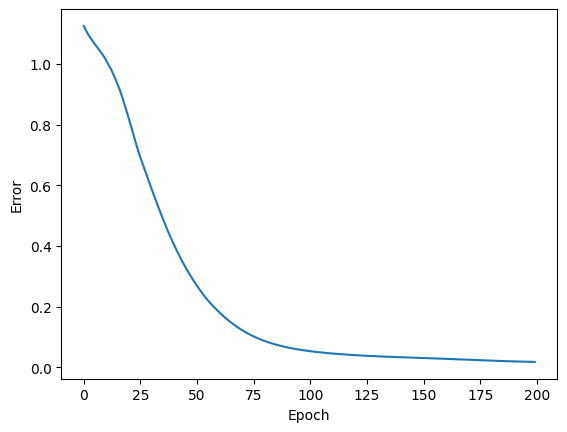

In [36]:
# Plot loss curve
plt.plot(range(Ne), errors)
plt.ylabel('Error')
plt.xlabel('Epoch')